<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/%EB%94%A5%EB%9F%AC%EB%8B%9D/Chaper_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 용어보기

1. 합성곱 : 작은 필터 이용해 이미지로부터 특징 뽑아냄
2. CNN : Convolutional Neural Network는 합성곱층 여러개로 쌓아만든 신경망
3. 특징 맵 : 합성곱층 결과
4. 데이터 증강, 전처리 : 데이터 수정기법
5. 이미지 정규화 : 이미지 픽셀 간 편향제거
6. 패딩 : 이미지 외곽을 0으로 채우는 기법
7. 크롭핑 : 이미지 일부분 제거
8. Max Pooling : 이미지 크기를 줄이는데 사용하는 기법
9. 전이 학습 : 학습된 모델의 파라미터 수정해 자신의 데이터셋에 최적화시키는 법

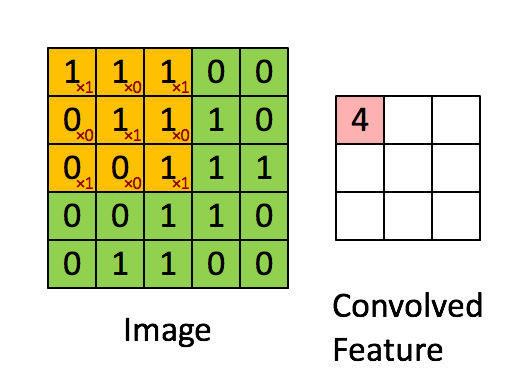

840만 개의 픽셀이 존재하는 4K UHD사진을 NN(Neural Network)로 처리하는데 840만 개가 다 필요할까?

계산하는데 시간은 미친듯이 들 것이다.

경국 작은 필터를 이용해 이미지의 특징을 추출해내는 합성곱(Convolution)을 고안함

필터

이미지는 2차원같아보이지만 실제로는 3차원[x,y,3(RGB)]이므로

각 색깔마다 특징을 추출하는 역할을 하는 커널들이 존재하고

이 커널들이 모여 필터를 구성한다.

###### 내가 닥터유 에너지바 40g짜리 680원에 3000개사서 1200원에 팔면 150만원을 벌 수 있다

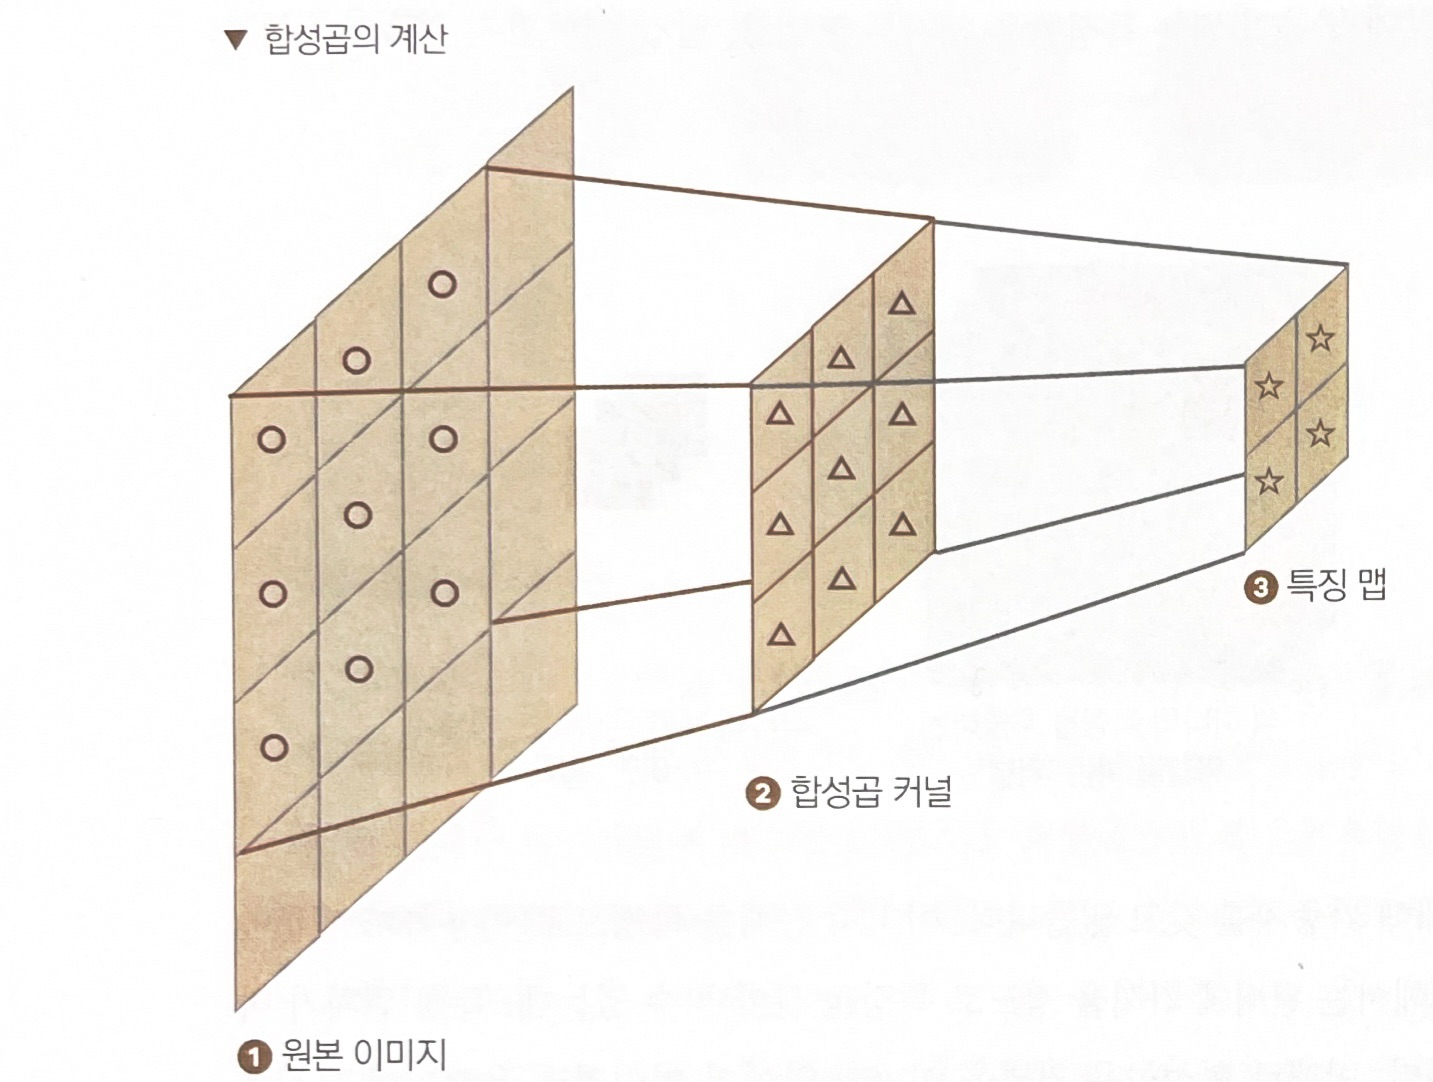

1. 원본 이미지
2. 합성곱 커널(분류)
3. 커널로 분류해낸 특징 맵

이와 같은 합성곱 층을 아주아주 여러개를 쌓아 만들어서 CNN이라고 부른다.

CNN의 층 구조는 다음과 같다. (자필)

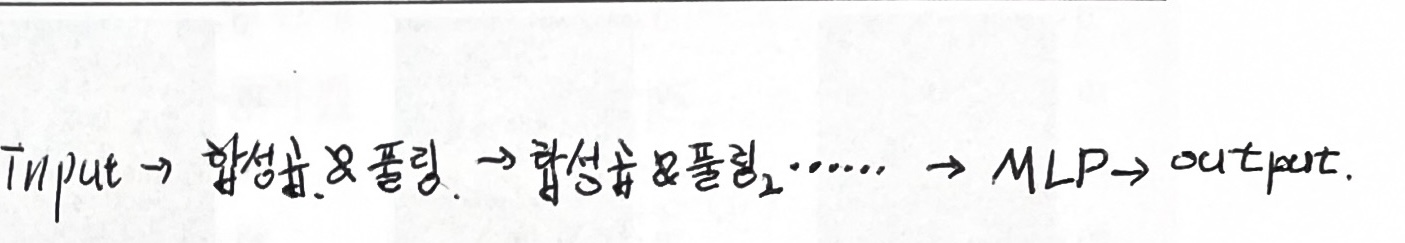

그렇다면, 지금부터 코드를 작성해보도록 하자

Files already downloaded and verified
Files already downloaded and verified


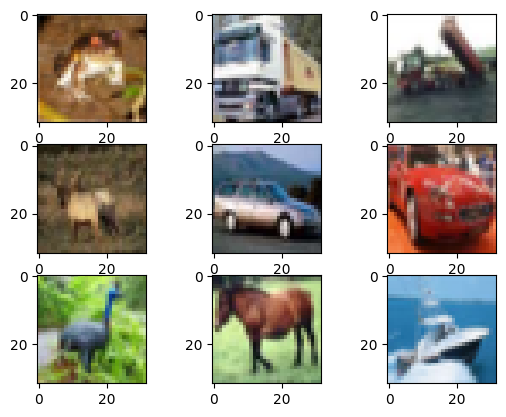

In [ ]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# CIFAR-10 데이터셋 불러오기
training_data = CIFAR10(
    root="./", # 내려받을 경로
    train=True, # 학습용인지 평가용인지 구분. 여기서는 학습용
    download=True, # 데이터 내려받을지
    transform=ToTensor()
)

test_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor()
)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(training_data.data[i])
plt.show()

### 데이터 증강
데이터 증강은 데이터 부족 or 과대적합(OverFitting)을 피하는 기법

데이터를 의도적으로 수정해 더 많은 데이터 확보

그러나 데이터 증강을 할 시에 이미지 크기가 잘릴 수 있으므로, 패딩을 사용해 잘려진 부분을 0으로 메꿔준다.

Files already downloaded and verified
Files already downloaded and verified


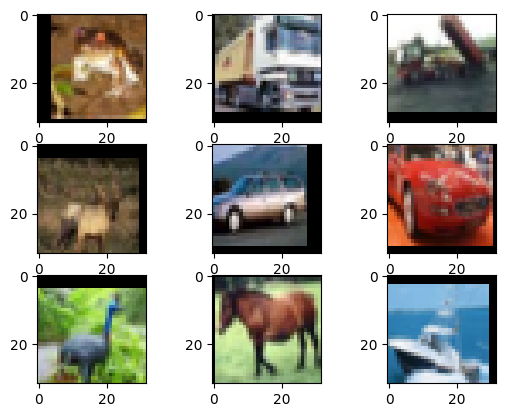

In [ ]:
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ # 데이터 전처리 함수
    T.ToPILImage(),
    RandomCrop((32,32),padding=4), # 랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5), # y축으로 기준으로 대칭
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms # transform에는 데이터를 변환하는 함수 추가됨
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

 # Compose는 전처리 함수 tf를 입력받아 차례대로 실행
 # RandomCrop은 이미지의 일부 제거하고 size크기로 복원
 # RandomHorizontalFlip(p) p확률로 이미지를 좌우대칭

Files already downloaded and verified
Files already downloaded and verified


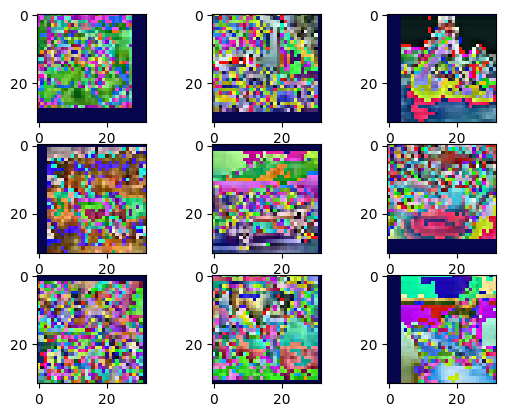

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

 # 데이터 전처리 정의
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32,32),padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),

    Normalize(mean=(0.4914,0.4822,0.4465),std=(0.247,0.243,0.261)), # 데이터 정규화 평균 mean, 표준편차 std
    T.ToPILImage()
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms # transform에는 데이터를 변환하는 함수 추가됨
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

In [ ]:
import torch

training_data = CIFAR10(
    root="/",
    train=True,
    download=True,
    transform=ToTensor()
)

 # item[0]은 이미지, item[1]은 정답 레이블

imgs = [item[0] for item in training_data]

 # imgs를 하나로 합쳐버림
imgs = torch.stack(imgs,dim=0).numpy()

 # RGB 각 평균
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()

 # RGB 각 표준편차
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()

print(std_r,std_g,std_b)

 # stack(tensor,dim) 텐서를 dim방향으로 합쳐줌. Ex) 224,224 크기의 텐서를 dim=0 방향으로 텐서 세 개를 합치면 3,224,224 모양의 텐서가 됨

Files already downloaded and verified
0.24703233 0.24348505 0.26158768


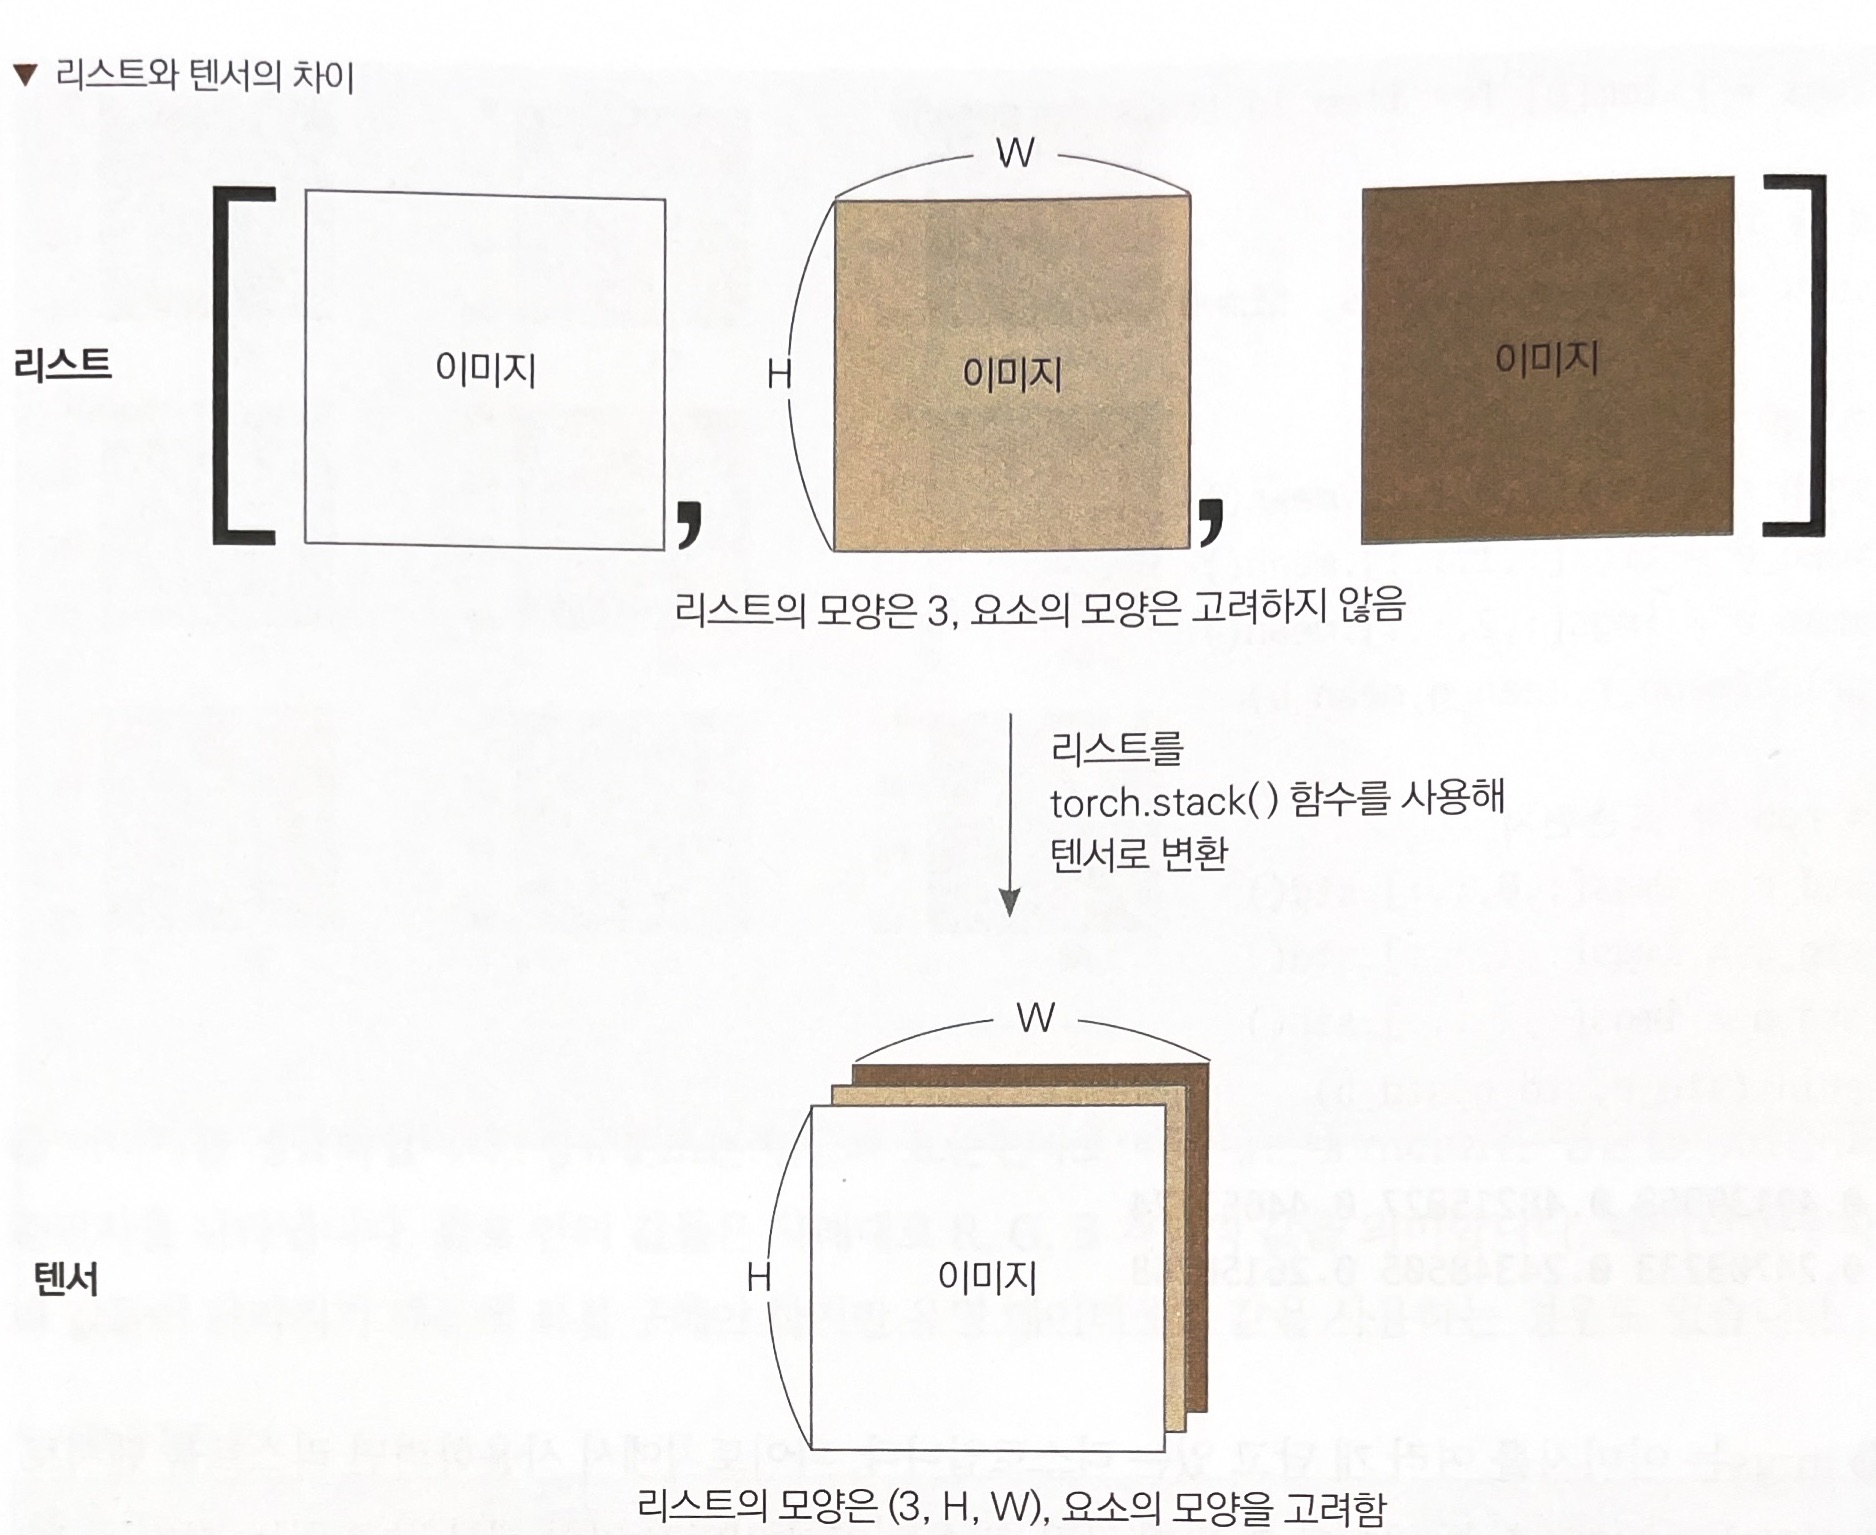

### CNN으로 이미지 분류

기본 블록 정의
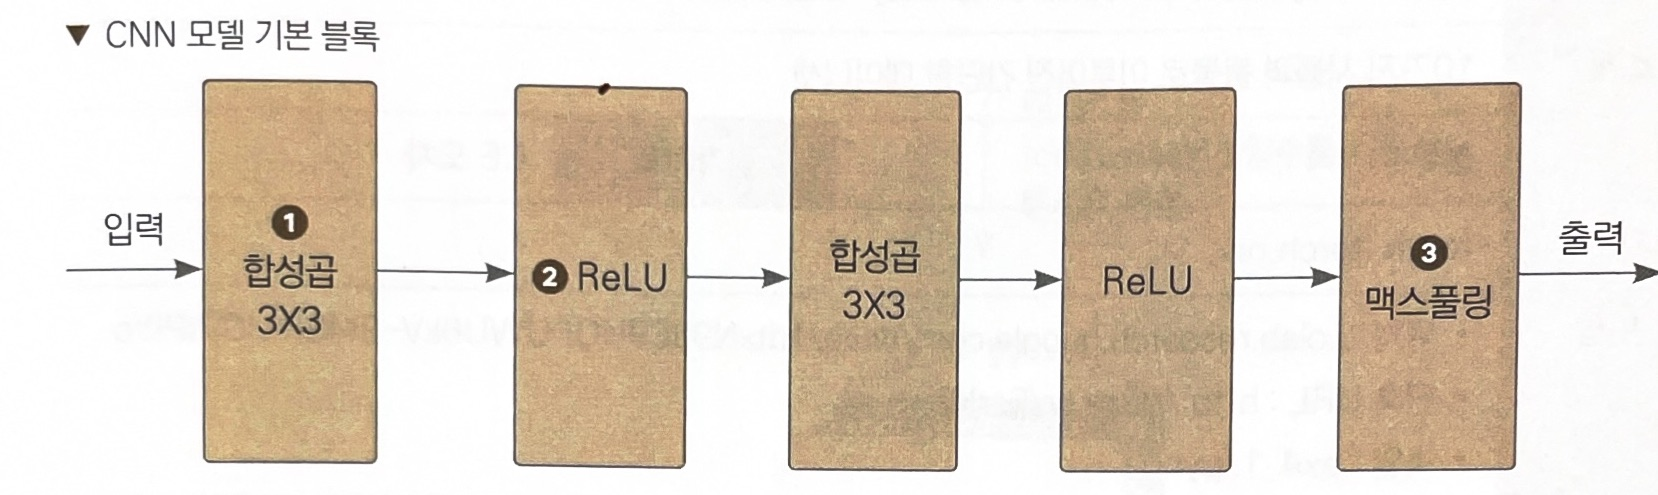

ReLU란?

양수인 값만 뉴런으로 넘기는 활성화 함수

Sigmoid말고 ReLU 쓰는 이유
1. 계산 효율성이 좋다(계산이 가벼움)
2. 기울기 소실 방지(Sigmoid는 입력값이 너무 크거나 작을 때 local minimum에 갇힐 수도 있지만 ReLU는 기울기가 일정하므로 문제 없음)

In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
   # 기본 블록을 구성하는 층 정의
  def __init__(self,in_channels,out_channels,hidden_dim): # 모듈 초기화
     # nn.Module 클래스의 요소 상속
    super(BasicBlock,self).__init__() # 부모 클래스 요소 사용

     # 합성곱층 정의
    self.conv1 = nn.Conv2d(in_channels,hidden_dim,
                           kernel_size=3,padding=1)
    self.conv2 = nn.Conv2d(hidden_dim,out_channels,
                           kernel_size=3,padding=1)

    self.relu = nn.ReLU()

     # stride는 커널의 이동 거리
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2)

  def forward(self,x): # 기본 블록의 순전파 정의
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)

    return x

In [ ]:
class CNN(nn.Module):
  def __init__(self,num_classes): # num_classes는 클래스 개수다
    super(CNN,self).__init__()

     # 합성곱 기본 블록 정의하기
    self.block1 = BasicBlock(in_channels=3,out_channels=32,hidden_dim=16)
    self.block2 = BasicBlock(in_channels=32,out_channels=128,hidden_dim=64)
    self.block3 = BasicBlock(in_channels=128,out_channels=256,hidden_dim=128)

     # 분류기 정의하기
    self.fc1 = nn.Linear(in_features=4096,out_features=2048)
    self.fc2 = nn.Linear(in_features=2048,out_features=256)
    self.fc3 = nn.Linear(in_features=256,out_features=num_classes)


    self.relu = nn.ReLU()

  def forward(self, x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.block3(x) # 출력 모양 : (-1,256,4,4)
    x=torch.flatten(x,start_dim=1) # 텐서 A를 1차원으로 아주 예~쁘게 풀어줌

    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)

    return x

### CNN 모델의 학습 루프

1. 모델 정의
2. 데이터 호출 및 데이터 증강
3. 손실 계산
4. 오차 역전파 및 최적화
5. 원하는 만큼 2로 다시 돌아가기
6. 학습종료

In [ ]:
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

  # 데이터 증강
transforms = Compose([
    RandomCrop((32,32),padding=4), # 랜덤 크롭핑
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    Normalize(mean=(0.4914,0.4822,0.4465), std=(0.247,0.243,0.261))
])

 # 데이터 로드 및 모델 정의하기
training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)
 # 데이터로더 정의하기
train_loader = DataLoader(training_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)
 # 학습을 진행할 프로세서 설정하기 (가능하다면 쿠다로 하지만, 안될 시에는 CPU로 사용하는 코드)
device = "cuda" if torch.cuda.is_available() else "cpu"
 # CNN 모델 정의하기
model = CNN(num_classes=10)
 # 모델을 device로 보내기
model.to(device)


lr=1e-3

optim = Adam(model.parameters(),lr=lr)

a=20

for epoch in range(a):
  for data, label in train_loader:
    optim.zero_grad()

    preds=model(data.to(device))

    loss=nn.CrossEntropyLoss()(preds,label.to(device)) # 모델에서 예측한 값이 실제 값과 비교시 틀릴 수 있는 정보량

    loss.backward()
    optim.step()

  if epoch==0 or epoch%10==9: # 10번마다 손실 출력
    print(f"epoch : {epoch+1} loss : {loss.item()}")

torch.save(model.state_dict(),"CIFAR_FINAL.pth")

Files already downloaded and verified
Files already downloaded and verified
epoch : 1 loss : 1.2008864879608154
epoch : 10 loss : 0.6717548966407776
epoch : 20 loss : 0.8338284492492676


In [ ]:
model.load_state_dict()